  
# Introduction to Quant Fianance 


In [1]:
import pandas as pd
#The following line seems to be necessary due to a newer version of pandas
pd.core.common.is_list_like = pd.api.types.is_list_like 

# Load packages
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override()

import datetime
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from pandas.util.testing import assert_frame_equal

## 1.	Background – Portfolio stock 
The yahoo finance website is used to select 11 active stocks to analyze for the time period 31 Dec 2018 - 31 Dec 2019. Today’s Active Canadian company stocks with intra-day volumes of above 500,000 were observed in the date timeframe mentioned above. Majority of the stocks in the portfolio are gold corporations. The table shows the company and tickers in Yahoo finance website. 


| YAHOO_TICKER | Company Name
| -------------|----------
| BTO.TO	      | B2Gold Corp.
| MFC.TO	| Manulife Financial Corporation
| CVE.TO	| Cenovus Energy Inc.
| ENB.TO	|Enbridge Inc.
| ABX.TO	 |Barrick Gold Corporation
| K.TO	  |Kinross Gold Corporation
| HR-UN.T  |H&R Real Estate Investment Trust
| KAT.TO	  | Katanga Mining Limited
| BMO.TO	  | Bank of Montreal
| YRI.TO	  | Yamana Gold Inc.


In [2]:
directory = "/Users/kemjika/Documents/Financial analysis/Python_introduction_580/"
filename = directory+'TSX_Listing 2019.csv'
tickers1 = pd.read_csv(filename)
tickers = list(tickers1['YAHOO_TICKER'])

Setting Time interval

In [3]:
start = datetime.datetime(2018, 12, 31)
end = datetime.datetime(2020, 1, 1)

Extract data from yahoo finance

In [4]:
f2AAPL = pdr.get_data_yahoo("AAPL", start, end)

#Intiate the dictionnary that will store all the downloaded tick data
d = pd.DataFrame()
#Loop over each tickers to load the data to be stored in the dictionnary d
for tick in tickers:
    print('Downloading '+tick)
    try:
        f = pdr.get_data_yahoo(tick,start,end,threads=False,progress=False)
        d[tick] = f['Adj Close']  # select the adjusted close price
    except ValueError:
        print(' No data found')
        

[*********************100%***********************]  1 of 1 completed


## Plot stock price 

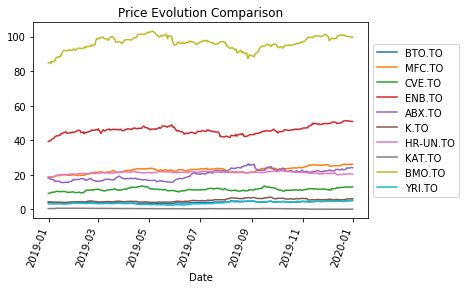

In [7]:

for i, col in enumerate(d.columns):
    d[col].plot()

plt.title('Price Evolution Comparison')

plt.xticks(rotation=70)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

The graph above is useful to compare price trends from the selected companies. Most stocks have experienced are relatively constant, however Bank of Montreal has a high variation in stock price varying from 80 to 100 over the one-year period observed. 

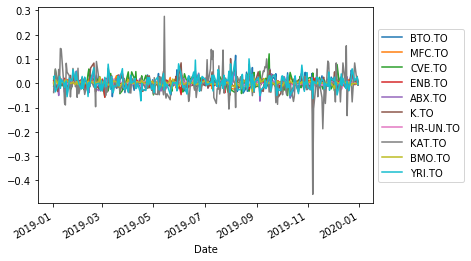

In [44]:
# how to calculate simple returns
ret = d.pct_change()


ret.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Returns of stocks 
The returns of most of the stocks vary between -0.1 and 0.1 , however Kinross Gold Corporation show large variations  with a high of 0.3 and a low of -0.45. This high variability makes this stock a risky investment.


### Correlation matrix of returns 

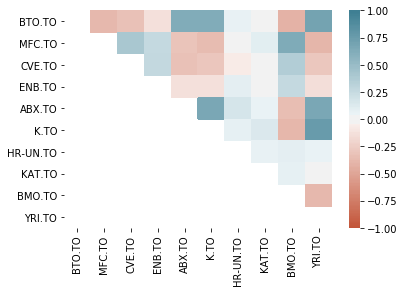

In [41]:
mask = np.tril(ret.corr())
sns.heatmap(ret.corr(), vmin=-1,cmap=sns.diverging_palette(20, 220, n=200), vmax=1, center= 0,mask=mask)

Based on the correlation matrix, the returns from H&R Real Estate Investment Trust and Katanga Mining Limited have almost no correlation with any other stock returns in the portfolio. 

## Calculating Stock statistics: Provides an output of mean stock statistics

In [17]:

#mean
ret_mean=ret.mean()
lret_mean=lret.mean()

#variance
ret_var=ret.var()
lret_var=lret.var()

#standard deviation
ret_std = ret.std()
ret_std2 = pd.DataFrame(ret.std())

#skewness
#from scipy.stats import skew
ret_skew=ret.skew()
ret_kurt=ret.kurt()
lret_skew = lret.skew()
lret_kurt = lret.kurt()
#estimate autocorrelation
# source http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html

#data=ret.dropna()
autocorr_res = []
acres_ln =[]
from scipy.stats import pearsonr
for i in ret.columns:
    data0 = ret[i]
    data = data0.dropna()
    corr, pval = pearsonr(data[:-1], data[1:])
    autocorr_res.append(corr)
    data1 = lret[i]
    data = data1.dropna()
    corr, pval=pearsonr(data[:-1], data[1:])
    acres_ln.append(corr)
    
out1 = pd.DataFrame(ret_mean)
out2 = out1.rename(columns={0: 'mean'})

#Next line we join with ret_std2 instead of ret_std, because they need to be dataframes
out3 = out2.join(ret_std2)
out4 = out3.rename(columns={0: 'std'})

#autocorr_res is a list data type
out4['autocorr'] = autocorr_res

#lret_mean is a timeseries data type, take its values
out4['lmn']=lret_mean.values
out4['lstd']=lret.std().values
out4['lac']=acres_ln
out4['skew'] = ret_skew.values
out4['kurt'] = ret_kurt.values
out4['lskew'] = lret_skew.values
out4['lkurt'] = lret_kurt.values

print(out4)

#save to csv file 
#out4.to_csv(directory+'out4.csv')

              mean       std  autocorr       lmn      lstd       lac  \
BTO.TO    0.001358  0.023711 -0.006428  0.001080  0.023556 -0.007063   
MFC.TO    0.001462  0.011370  0.042679  0.001397  0.011365  0.044728   
CVE.TO    0.001582  0.022143 -0.040664  0.001340  0.021945 -0.037224   
ENB.TO    0.001085  0.010589 -0.066406  0.001028  0.010665 -0.067956   
ABX.TO    0.001292  0.019779  0.102820  0.001097  0.019767  0.103451   
K.TO      0.001664  0.025494  0.088500  0.001341  0.025438  0.086305   
HR-UN.TO  0.000351  0.006662  0.086162  0.000329  0.006664  0.086654   
KAT.TO   -0.003722  0.057017  0.081695 -0.005523  0.061915  0.086857   
BMO.TO    0.000670  0.007395  0.121277  0.000643  0.007410  0.120790   
YRI.TO    0.002313  0.028657 -0.011611  0.001907  0.028410 -0.010801   

              skew       kurt     lskew      lkurt  
BTO.TO    0.529725   1.672612  0.415787   1.350000  
MFC.TO   -0.141988   0.584862 -0.185324   0.603856  
CVE.TO    0.780483   3.195356  0.638783   2.6213

## 2.	Key Stock returns Statistics 
The table below provides key stock return statistics for each stock. 
Mean and standard deviation:  The standard deviation tells you how much the portfolio's return can deviate from the mean historical return. All of stocks in the portfolio have standard deviation that are greater than the mean, meaning that there is a higher risk, however this could be in the investor’s favour as this means above average returns.


BTO.TO      0.001358
MFC.TO      0.001462
CVE.TO      0.001582
ENB.TO      0.001085
ABX.TO      0.001292
K.TO        0.001664
HR-UN.TO    0.000351
KAT.TO     -0.003722
BMO.TO      0.000670
YRI.TO      0.002313
dtype: float64


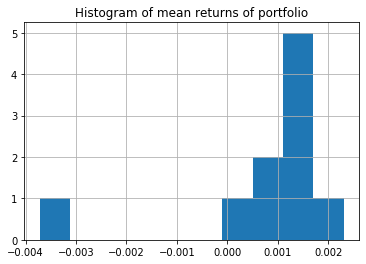

In [51]:
ret_mean.hist()
plt.title('Histogram of mean returns of portfolio')
print(ret_mean)


In [42]:
ss1 = pd.DataFrame(out4.mean())
ss1 = ss1.rename(columns={0: 'summary stat mean'})
ss1['summary stat std'] = out4.std().values
print(ss1)

          summary stat mean  summary stat std
mean               0.000806          0.001680
std                0.021282          0.014822
autocorr           0.039802          0.066189
lmn                0.000464          0.002147
lstd               0.021713          0.016133
lac                0.040574          0.066250
skew              -0.181427          0.779699
kurt               3.809542          5.237033
lskew             -0.478148          1.226972
lkurt              5.740313         11.185399


#### Skewness and Kurtosis: 
Higher kurtosis means more of the variance is as a result of infrequent deviations as opposed to frequent modestly sized deviations. 50% of the stocks in the portfolio are Leptokurtic (fat tailed). In the summary table, the portfolio shows a kurtosis of 5.23 and logical kurtosis of 23, which is undesirable for investments. 
Enbridge Inc and Katanga Mining Limited returns have a highly skewed distribution (negative), however the skewness is decreased to symmetric distribution when the all the stock returns in the portfolio is examined. 
#### Autocorrelation: 
With low autocorrelations of -0.1 – 0.1, the degree of similarity between a given time series and a lagged version of itself over successive time intervals is minimal thus past returns do not seem to influence future returns.


## Portfolio Returns and statistics of portfolio statistics 
Managing Portfolio diversification can be carried out in two ways:  stock returns are rebalanced to equal weights each day or the Buy and hold option where the investment in stocks are initially equal weighted and not rebalanced.
The portfolio returns for both options are calculated and the cumulative returns are shown in the figure below:





In [5]:
ret2 = d.pct_change()# duplicate
meanDailyReturns = ret2.mean() #mean daily returns 
w = 1/len(d.columns)

# Define weights for the portfolio
weights = np.array([w,w,w,w,w,w,w,w,w,w])
ret2['Portfolio']= ret2.dot(weights)

# Calculate cumulative returns
daily_cum_ret=((1+ret2).cumprod())-1
daily_cum_ret.Portfolio.tail()


Date
2019-12-23    0.180770
2019-12-24    0.191846
2019-12-27    0.201208
2019-12-30    0.210515
2019-12-31    0.209140
Name: Portfolio, dtype: float64

Text(0.5, 1.0, 'Cumulative Returns for Daily rebalanced stock')

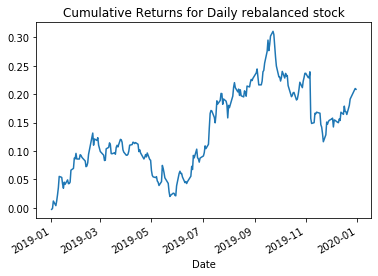

In [53]:
daily_cum_ret.Portfolio.plot()
plt.title('Cumulative Returns for Daily rebalanced stock')


## Calculate porfoilio statistics

In [7]:
ret3 = daily_cum_ret.Portfolio # returns from all stocks rebalanced daily

#Example on how to compute the log returns for all the stocks in d
lret1 = np.log(1+ret3)
lret3 = np.log(d) - np.log(d.shift())

#mean
ret_mean1=ret3.mean()
lret_mean1=lret1.mean()

#variance
ret_var1=ret3.var()
lret_var1=lret1.var()

#standard deviation
ret_std1 = ret3.std()


#skewness

ret_skew1=ret3.skew()
ret_kurt1=ret3.kurt()
lret_skew1 = lret1.skew()
lret_kurt1 = lret1.kurt()


data = ret3.dropna()
corr1, pval1 = pearsonr(data[:-1], data[1:])
data1 = lret1.dropna()
corr2, pval2 = pearsonr(data1[:-1], data1[1:])



autocorr_res1 = corr1
acres_ln1 = corr2


### B) rebalanced to equal weights each day

In [9]:
norm_ret = d/d.iloc[0,:]
norm_ret['returns'] = (norm_ret.sum(axis=1)/norm_ret.sum(axis=1)[0])-1


#### Plot returns comparing both returns

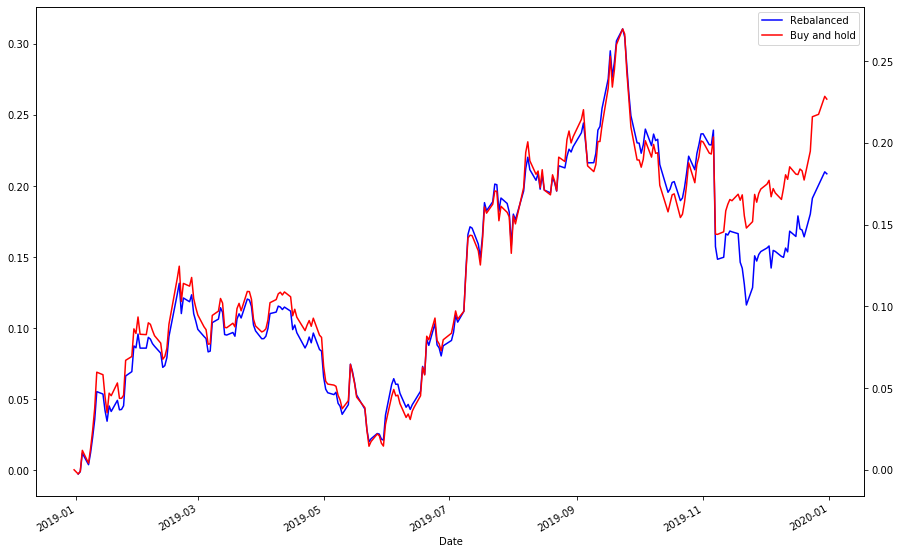

In [35]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
#rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

daily_cum_ret['Portfolio'].plot(ax=ax1, style='b-')
norm_ret['returns'].plot(ax=ax2, style='r-')


ax2.legend([ax1.get_lines()[0],
            ax2.get_lines()[0]],
           ['Rebalanced', 'Buy and hold'])

### Portfoilio Statistics

In [10]:
#mean
ret3a =  norm_ret['returns'] # returns from all stocks rebalanced daily

#Example on how to compute the log returns for all the stocks in d
lret1a = np.log(1+ret3a)

ret_mean1a=ret3a.mean()
lret_mean1a=lret1a.mean()



#variance
ret_var1a=ret3a.var()
lret_var1a=lret1a.var()

#standard deviation
ret_std1a = ret3a.std()


#skewness
#from scipy.stats import skew
ret_skew1a=ret3a.skew()
ret_kurt1a=ret3a.kurt()
lret_skew1a = lret1a.skew()
lret_kurt1a = lret1a.kurt()

from scipy.stats import pearsonr

dataa = ret3a.dropna()
corr1a, pval1a = pearsonr(dataa[:-1], dataa[1:])
data1a = lret1a.dropna()
corr2a, pval2a = pearsonr(data1a[:-1], data1a[1:])



autocorr_res1a = corr1a
acres_ln1a = corr2a






The figure above shows that the buy and hold strategy produced higher returns most of the time. At the end of the observation period the cumulative return for the rebalancing strategy is 20.85% and that of the buy and hold strategy is 22.67%.


Comparing these statistics with that of the stock returns in section 2, the returns from diversification can be seen in the higher average returns observed in the table above. The statistics above show that the returns are symmetric and normally distributed with not fat tailed. Diversifying investments has reduced the volatility that is associated with some stocks. 
The portfolio returns show a positive autocorrelation meaning that the the degree of similarity between a given time series and a lagged version of itself over successive time intervals is high thus past returns do seem to influence future returns.


## 4.	Discussion 
Diversification using the buy /hold strategy and rebalancing strategies have some advantages. Examining the strategy of daily rebalancing of stocks in a portfolio is not realistic for the following reasons:
1.	High costs due to transaction costs and possible tax liabilities 
2.	Time consuming as trading excess stocks and buying stocks take time and this process cannot be repeated on a daily frequency.
3.	May not be useful as some assets in the portfolio haven't experienced a large appreciation

The buy and hold option of portfolio management is a more realistic strategy given sufficient time between the rebalance process is observed.  The time between rebalancing should depend on the kind of stocks in the portfolio and how much risk the owner of the portfolio is willing to take on. By waiting for too long between the rebalancing events means that the stock proportion may drift, therefore the risks are not diversified. A too short time between rebalancing periods may result in costs and may not be useful as some assets in the portfolio haven't experienced a large appreciation


## Reference

1.  http://pandas.pydata.org/pandas-docs/stable/remote_data.html
2. https://github.com/pydata/pandas/blob/master/pandas/io/data.py